<a href="https://colab.research.google.com/github/pswami12/DataScienceFiles/blob/main/5th_CNN_1673781942278.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


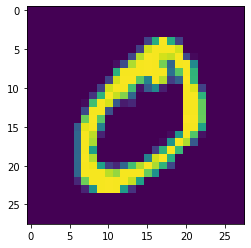

In [ ]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, kernel_size = 3, activation='relu', input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, kernel_size = 3, activation='relu')) #24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, kernel_size = 1, activation='relu')) #24

model.add(MaxPooling2D(pool_size=(2, 2)))#12

model.add(Convolution2D(16, kernel_size = 3, activation='relu'))#10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, kernel_size = 3, activation='relu'))#8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, kernel_size = 3, activation='relu'))#6
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, kernel_size = 3, activation='relu'))#4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, kernel_size = 4))
#keras.layers.AveragePooling2D(pool_size=(4, 4))
#model.add(BatchNormalization())
#model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 10)       40        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 10)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        1456      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 16)        0

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)



Epoch 1: LearningRateScheduler setting learning rate to 0.003.
Epoch 1/20
469/469 [==============================] - 16s 9ms/step - loss: 0.2280 - accuracy: 0.9283 - val_loss: 0.1976 - val_accuracy: 0.9358 - lr: 0.0030

Epoch 2: LearningRateScheduler setting learning rate to 0.0022744503.
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0458 - val_accuracy: 0.9855 - lr: 0.0023

Epoch 3: LearningRateScheduler setting learning rate to 0.0018315018.
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0489 - accuracy: 0.9843 - val_loss: 0.0343 - val_accuracy: 0.9898 - lr: 0.0018

Epoch 4: LearningRateScheduler setting learning rate to 0.0015329586.
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0352 - val_accuracy: 0.9895 - lr: 0.0015

Epoch 5: LearningRateScheduler setting learning rate to 0.0013181019.
Epoch 5/20
469/469 [===========

In [ ]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.022812770679593086, 0.9936000108718872]
